# Assignment 5:  Due 10/6

In this assignment you will become familiar with the Pandas library through the exploration of a Nobel prize data set. 

This data set was taken from the Kaggle website (https://www.kaggle.com/). If you are interested in data science and / or analysis, this website offers tons of data sets in various formats that you can access. They even post compititions that you can enter, some with money prizes awarded.

The libraries needed for this assignment are listed below.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

# 1a)

Read in the data set 'data/nobel.csv' into a DataFrame using Pandas .

In [3]:
df = pd.read_csv('data/nobel.csv')

# 1b)

Display below the output from the DataFrame functions *info*.

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

# 1c)

Show the first 5 listings of the dataset.

In [5]:
df.head(5)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


# Problem 2

How many null ('NaN') values there are in each *catagory*? What is the total number of Null values in the DataFrame?

In [11]:
nans = df.isna()
nans.sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

In [12]:
nans.sum().sum()

1912

# Problem 3

Make a histogram of the number of nobel prizes awarded per year. Around which decade (1900, 1910, 1920, ...) were the least amount of prizes awarded?

<IPython.core.display.Javascript object>


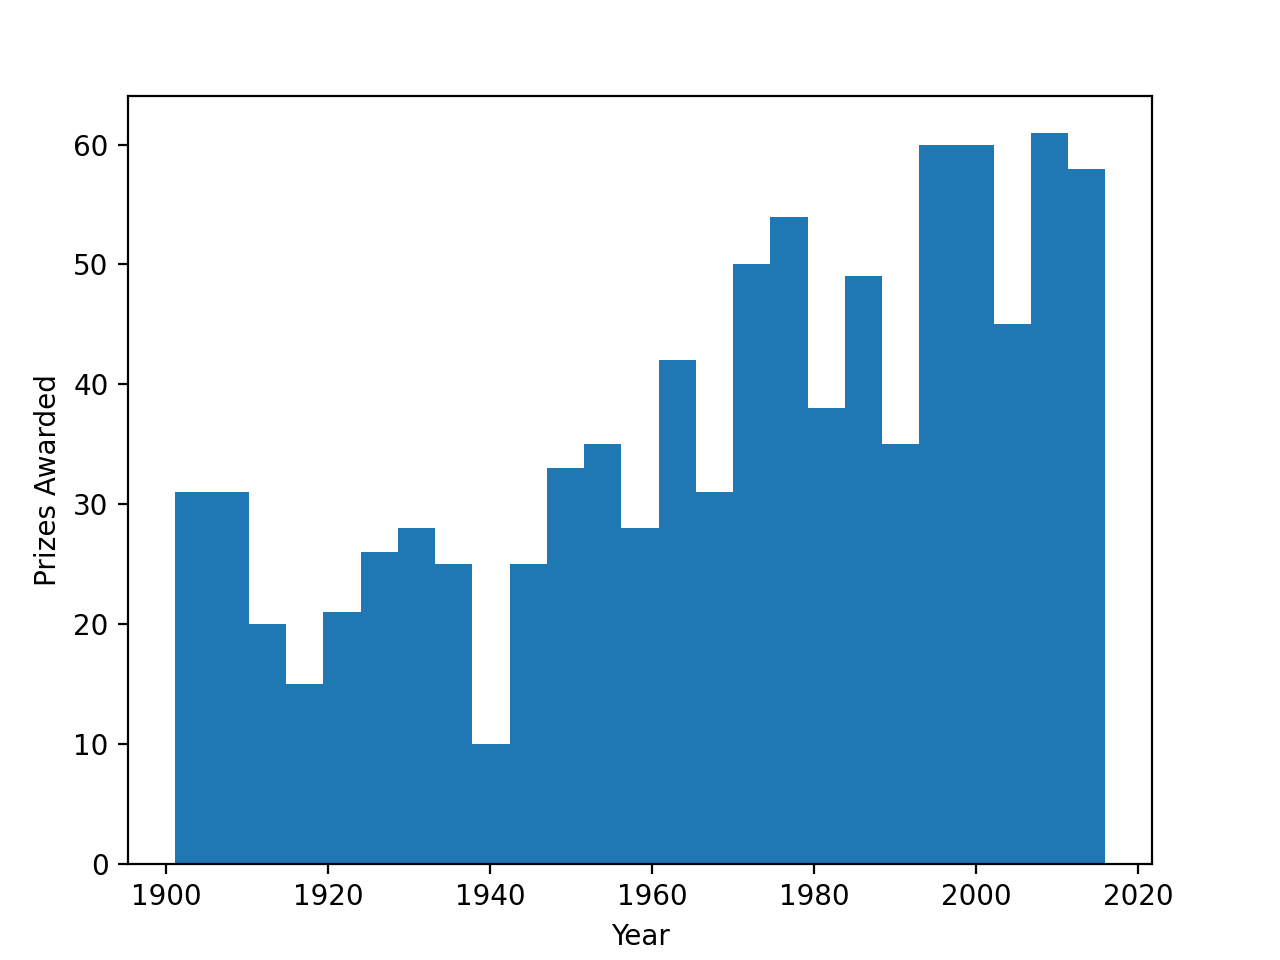

The least prizes were awarded around the 1940s


In [13]:
fig= plt.figure()
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.hist(df.year, bins = 25)
axes.set_xlabel("Year")
axes.set_ylabel("Prizes Awarded")
print("The least prizes were awarded around the 1940s")

# Problem 4

Use groupby method to printout the number of prizes awarded to each category. Which categroy has the most prizes?

In [18]:
cat = df.groupby('category')
num=cat.count()
np= num['prize']
print(np)

In [23]:
np[np == np.max()]


category
Medicine    211
Name: prize, dtype: int64

# Problem 5

Find percentage of the prizes were awarded to 1, 2, 3, and 4 people? Meaning what percentage of 1/1, 1/2, 1/3, and 1/4 prize_shares are there?

In [31]:
s= df.groupby('prize_share')
ns= s.count()
x= ns.prize
perc= (100* x/x.sum())
print(perc[0],"% given to one person")
print(perc[1], "% given to two people")
print(perc[2], "% given to three people")
print(perc[3], "% given to four people")

37.76070252469813 % given to one person
33.589462129527995 % given to two people
22.063666300768386 % given to three people
6.586169045005488 % given to four people


# Problem 6

Determine how many males and females won the prize. Does the sum of male and female prizes add up to the total entries? If not, why?

On the same graph make histograms for the numbber of males and females that won the prize each year. 

In [34]:
sex = df.groupby('sex').count().year

print(f'Total males and females is {sex.sum()} \nTotal people who received an award is {df.count().year}')

#the numbers aren't equal because there are some unknown sexes represented by NaN values. 

Total males and females is 885 
Total people who received an award is 911


<IPython.core.display.Javascript object>


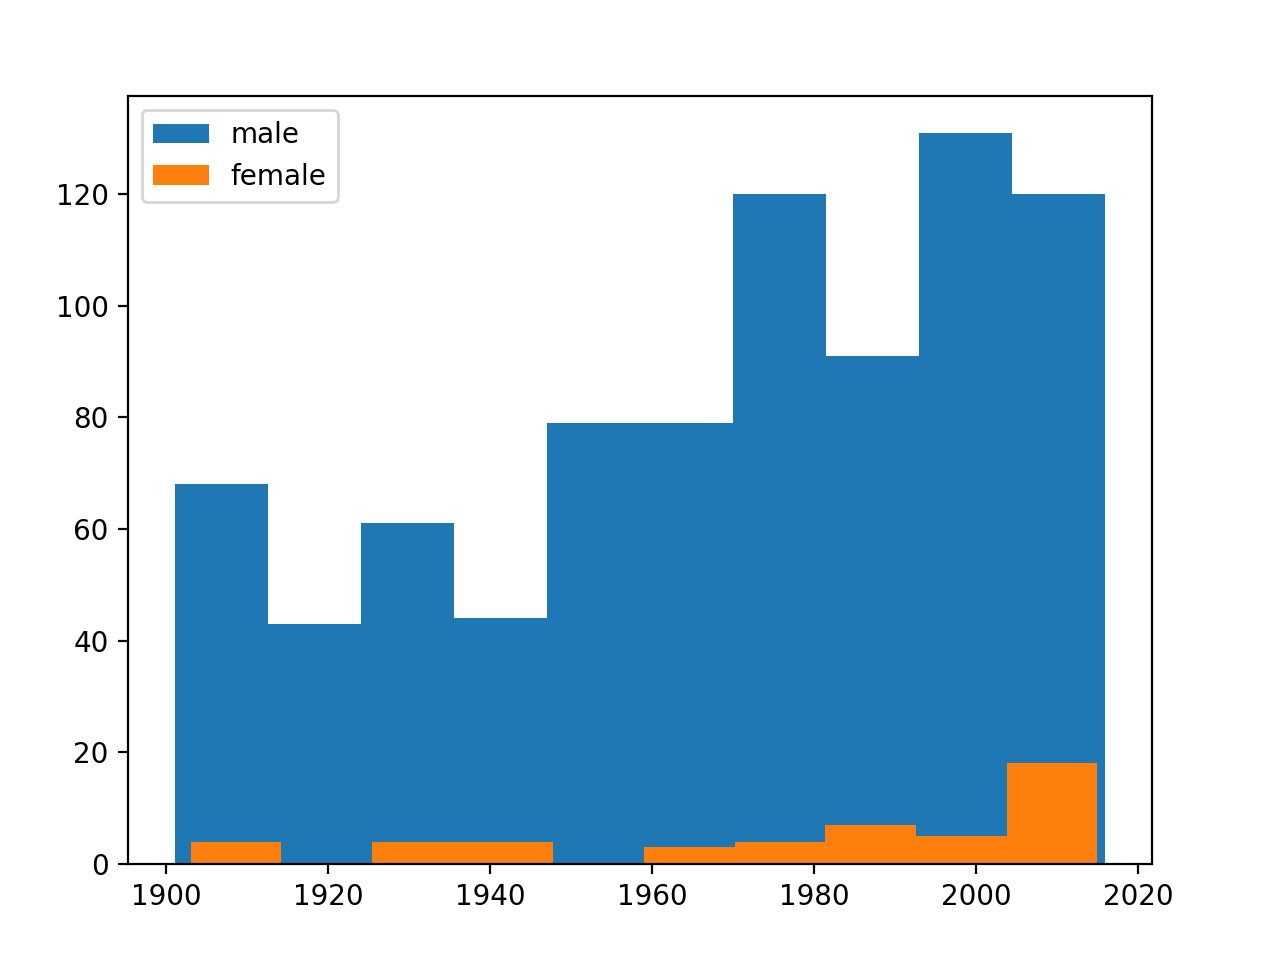

In [44]:
f= df[df['sex']== 'Female']
m= df[df['sex']== 'Male']

fig= plt.figure()
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.hist(m.year, label= 'male')
axes.hist(f.year,label= 'female')
axes.set_xlabel=("year")
axes.set_ylabel=("number of award winners")
axes.legend();

# Problem 7

How many prizes were won by those whose birth country was United States of America?

In [46]:
sum(df['birth_country']== 'United States of America')


259

# Problem 8

Determine the age that each of the prize winners was when they won the prize. Find the youngest and oldest to win the prize. Find the mean age to win the prize, and the standard deviation of it. Make a histogram of the age each person was when they won the prize.

### Hint: You can use Pandas DatetimeIndex method to extract the year from the date format yyyy-mm-dd
> pd.DatetimeIndex(date).year

Where *date* is given in a formate like year-month-day, the above will returen the year, hence the *.year* in the call above. Use 'shit+tab' on pandas.DatetimeIndex to learn more.

In [51]:
birth_year= pd.DatetimeIndex(df.birth_date).year
age= df.year- birth_year
loc_min=age.argmin()
loc_max= age.argmax()
mean_age= age.mean()
standard_dev= age.std()
Oldest= df[ 'full_name'][loc_max], age.max()
Youngest= df['full_name'][loc_min], age.min()
print(f'Oldest is {Oldest[0]}')
print(f'Youngest winner is {Youngest[0]}')
print(f'The average age: {mean_age} and {standard_dev} in years')

Oldest is Leonid Hurwicz
Youngest winner is Malala Yousafzai
The average age: 59.453001132502834 and 12.39929042786365 in years


<IPython.core.display.Javascript object>


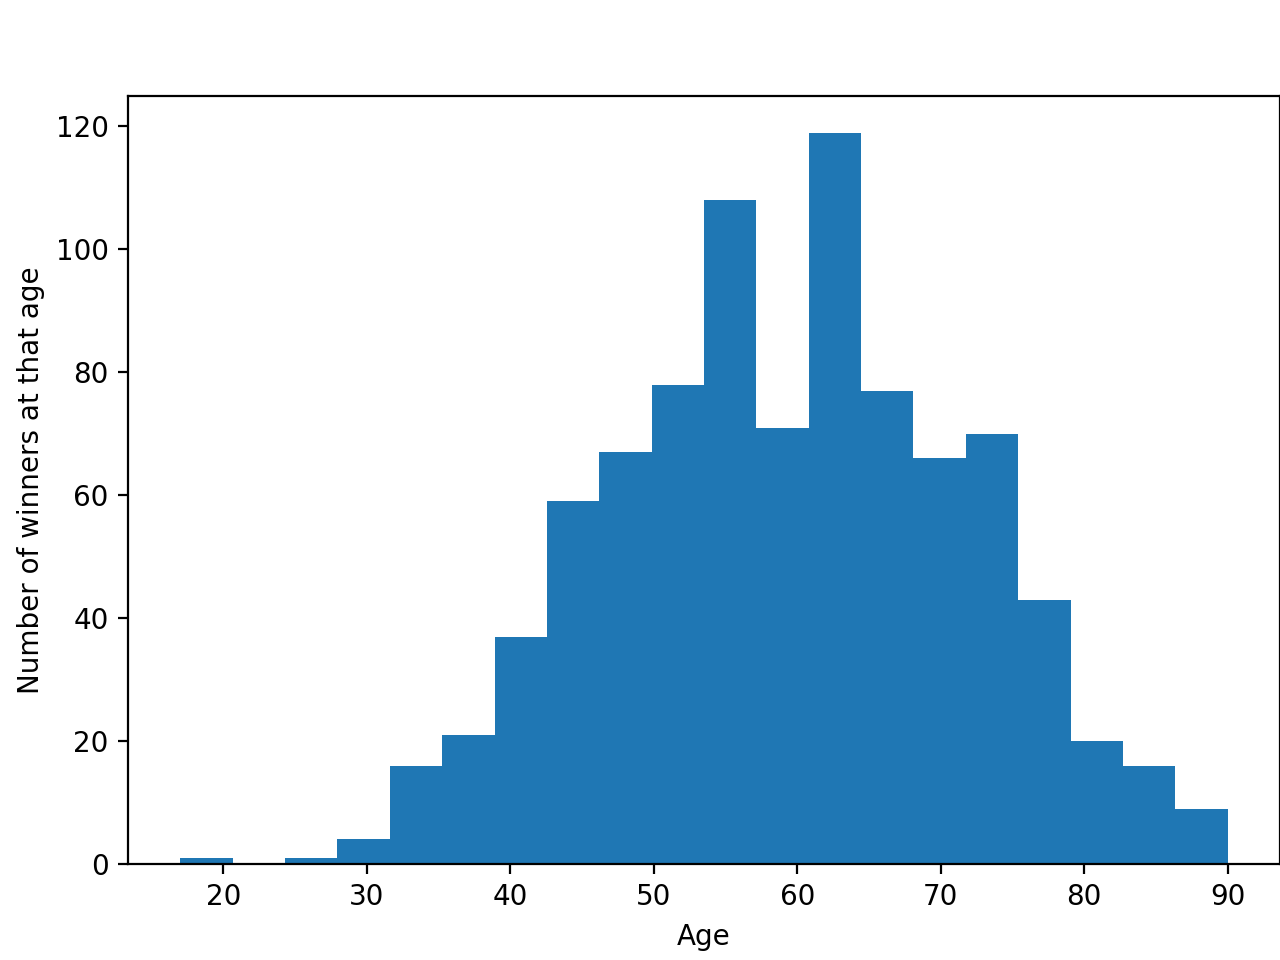

Text(0, 0.5, 'Number of winners at that age')

In [55]:
fig= plt.figure()
axes= fig.add_axes([0.1,0.1,0.9,0.8])
axes.hist(age, 20)
axes.set_xlabel( "Age")
axes.set_ylabel("Number of winners at that age")


# Problem 9

Make a copy of the current DataFrame. Then drop the column *lauret_id* from the copied DataFrame (do this inplace so this column is gone).

In [58]:
dfcopy = df.copy()
dfcopy.drop('laureate_id', axis=1, inplace=True)



In [57]:
dfcopy.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


# Problem 10

Add the age column you calculated in Problem 8 to the DataFrame.

In [59]:
dfcopy['age'] = age